# Solving a regression problem

## Dataset and libraries
We import necessary `Python` libraries, load and inspect the dataset to get familiar with its structure and contents.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/enviro_indicators.csv', index_col=0)
data.head()

,forest_coverage,biodiversity_index,protected_areas,deforestation_rate,carbon_sequestration,soil_erosion,land_degradation,rural_population,population_density
Country,,,,,,,,,
Vietnam,36.217808,6.505159,14.832708,36.583106,53.128459,7.987880,55.020903,35.912142,468.715839
Guinea-Bissau,76.550001,94.888554,23.994363,123.384939,279.836286,13.013811,41.655073,34.639379,351.054600
Bosnia and Herzegovina,61.239576,96.563203,9.932348,115.743745,237.834951,13.037065,26.951490,78.380633,289.329973
Lesotho,51.906094,80.839735,33.076894,111.752369,149.948515,11.179719,27.460479,43.585863,57.616482
Indonesia,20.921305,30.461377,7.609273,46.450326,103.939415,2.715506,46.297784,73.522793,311.353541


## 3. Data exploration

Here we will perform a preliminary exploration of our dataset to get a better understanding of the data we are working with.

In [13]:
# Displaying data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Vietnam to Liechtenstein
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   forest_coverage       32 non-null     float64
 1   biodiversity_index    32 non-null     float64
 2   protected_areas       32 non-null     float64
 3   deforestation_rate    32 non-null     float64
 4   carbon_sequestration  32 non-null     float64
 5   soil_erosion          32 non-null     float64
 6   land_degradation      32 non-null     float64
 7   rural_population      32 non-null     float64
 8   population_density    32 non-null     float64
dtypes: float64(9)
memory usage: 2.5+ KB


C:\Users\Geoffrey\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


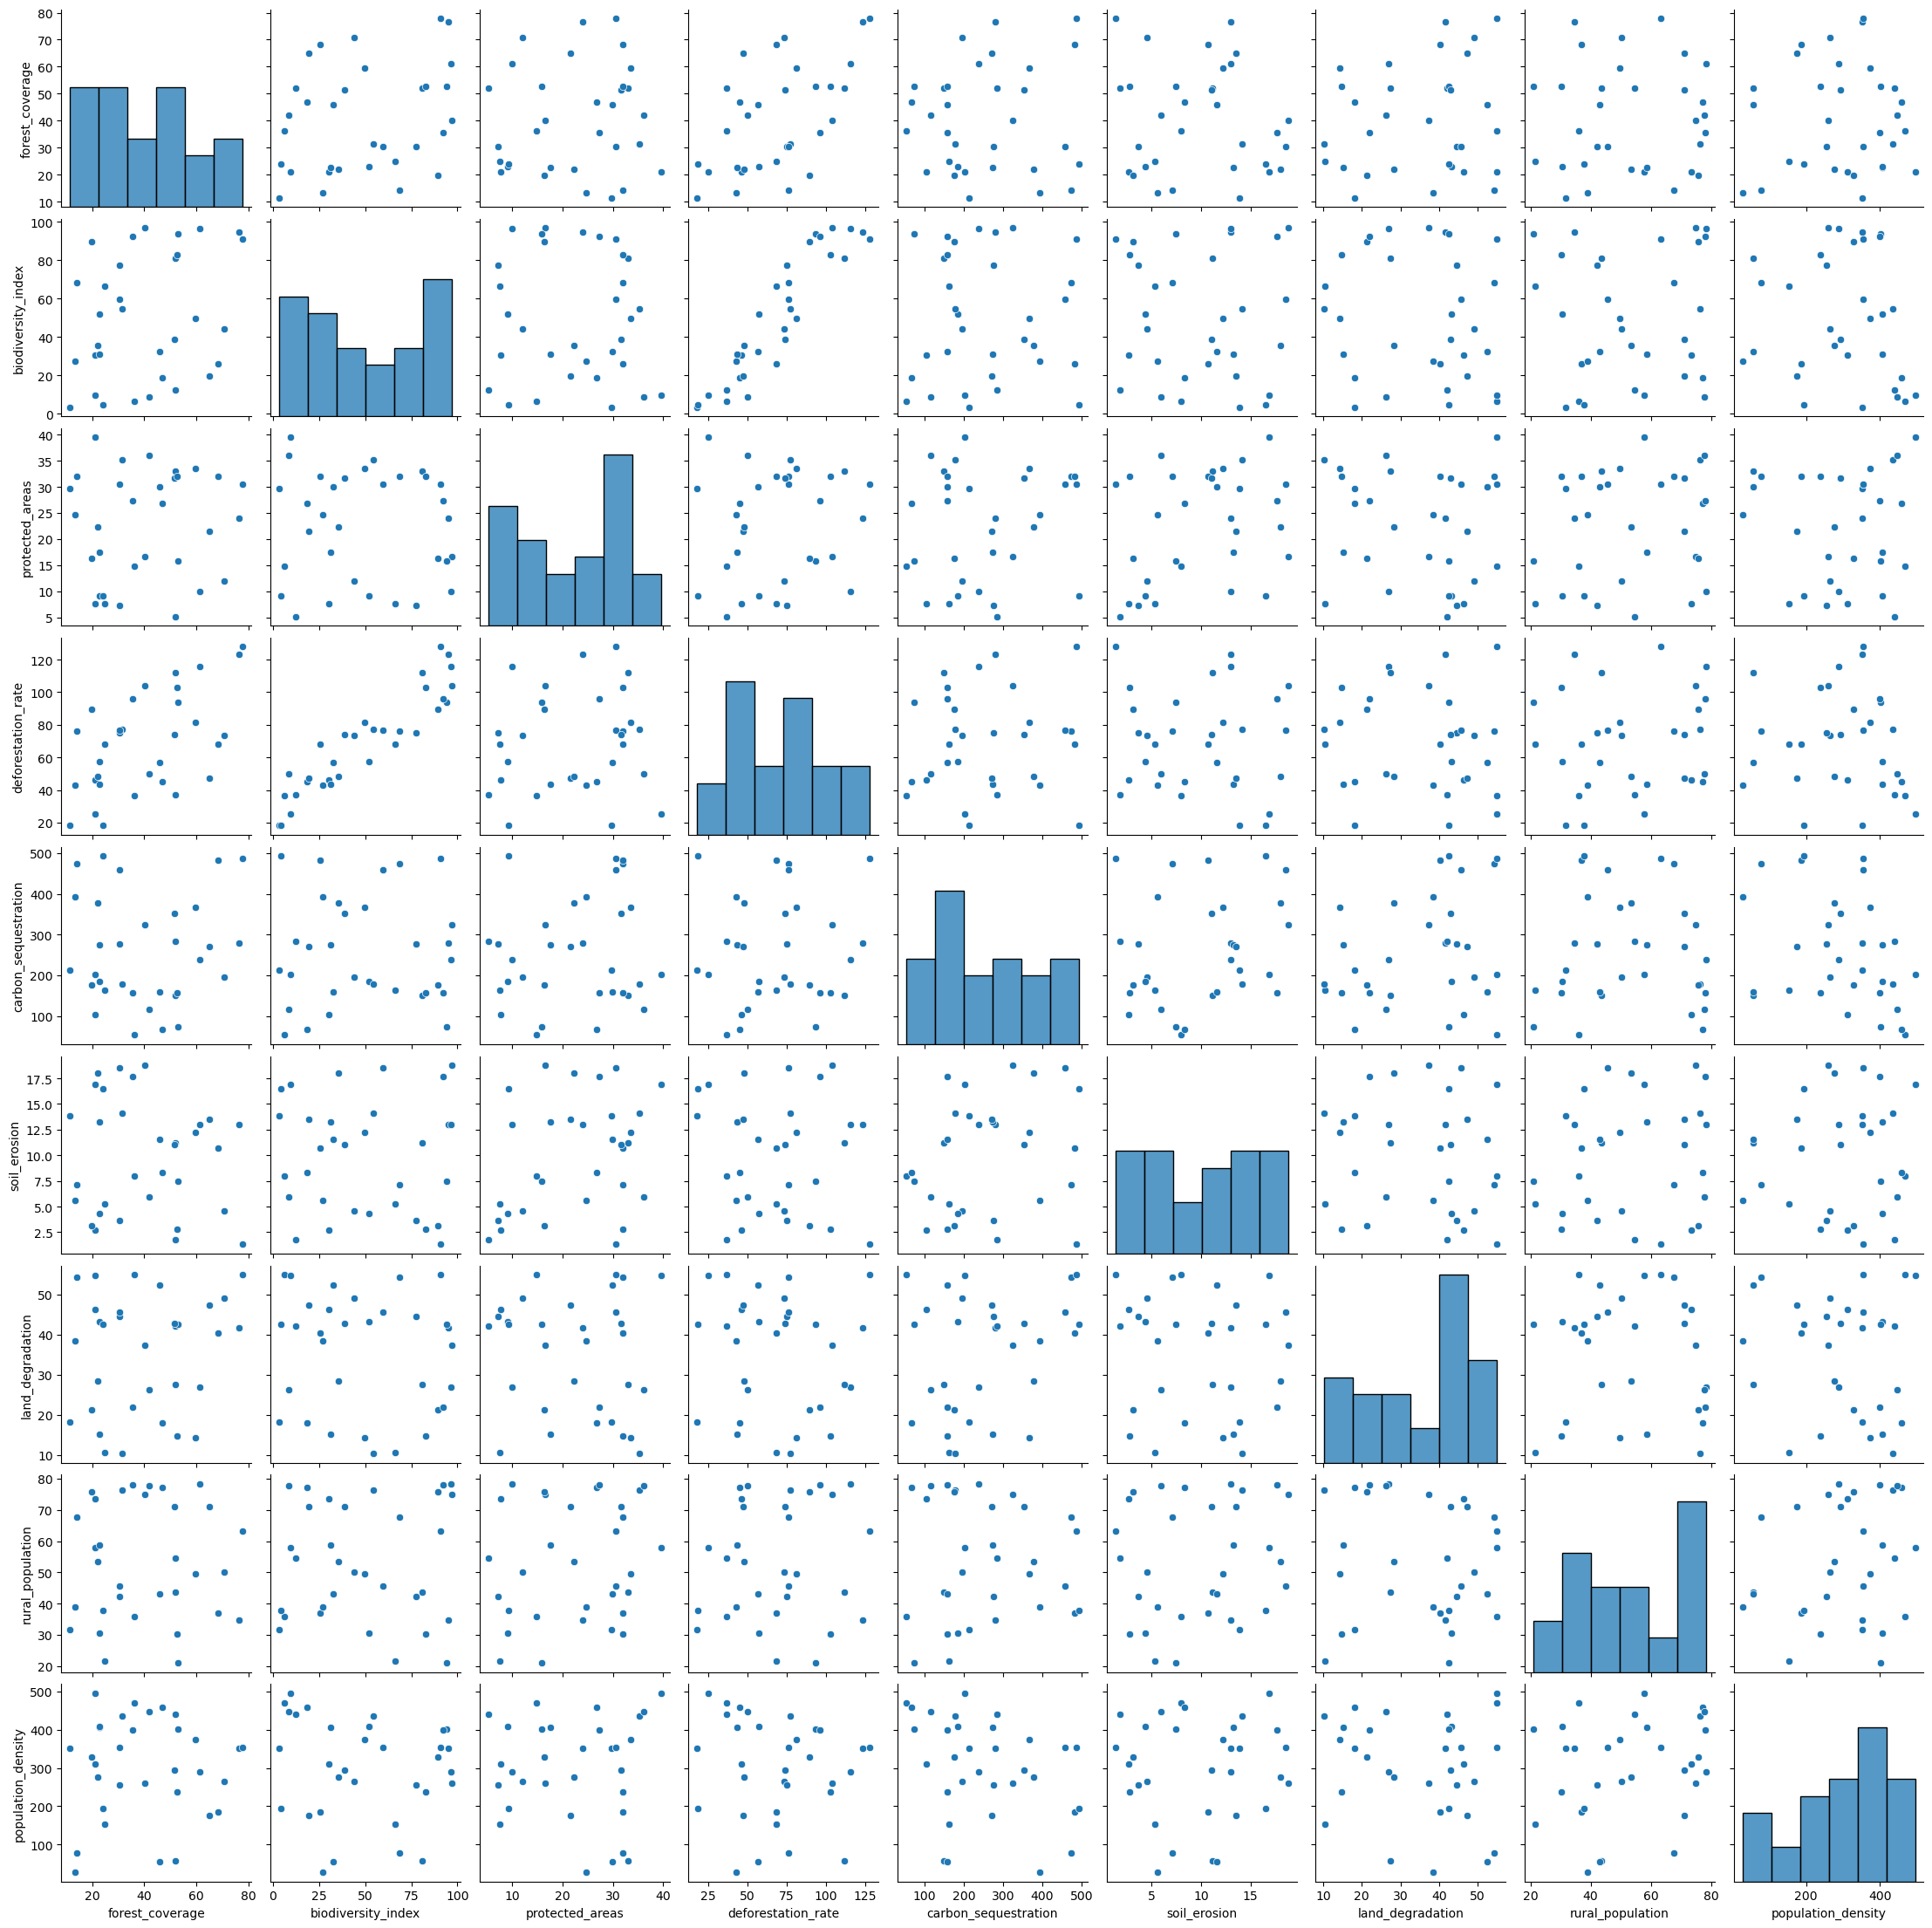

In [14]:
sns.pairplot(data)
plt.show()

Next, we perform **correlation analysis** to understand the correlation between the different features present in our dataset and our target variable,`deforestation_rate`.

In [15]:
# Calculating the correlation coefficients
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['deforestation_rate'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlation of features with deforestation rate:\n", correlation_with_target)

Correlation of features with deforestation rate:
 deforestation_rate      1.000000
biodiversity_index      0.922463
forest_coverage         0.556136
protected_areas         0.120202
rural_population        0.105760
carbon_sequestration    0.063443
soil_erosion           -0.082024
land_degradation       -0.092885
population_density     -0.126157
Name: deforestation_rate, dtype: float64


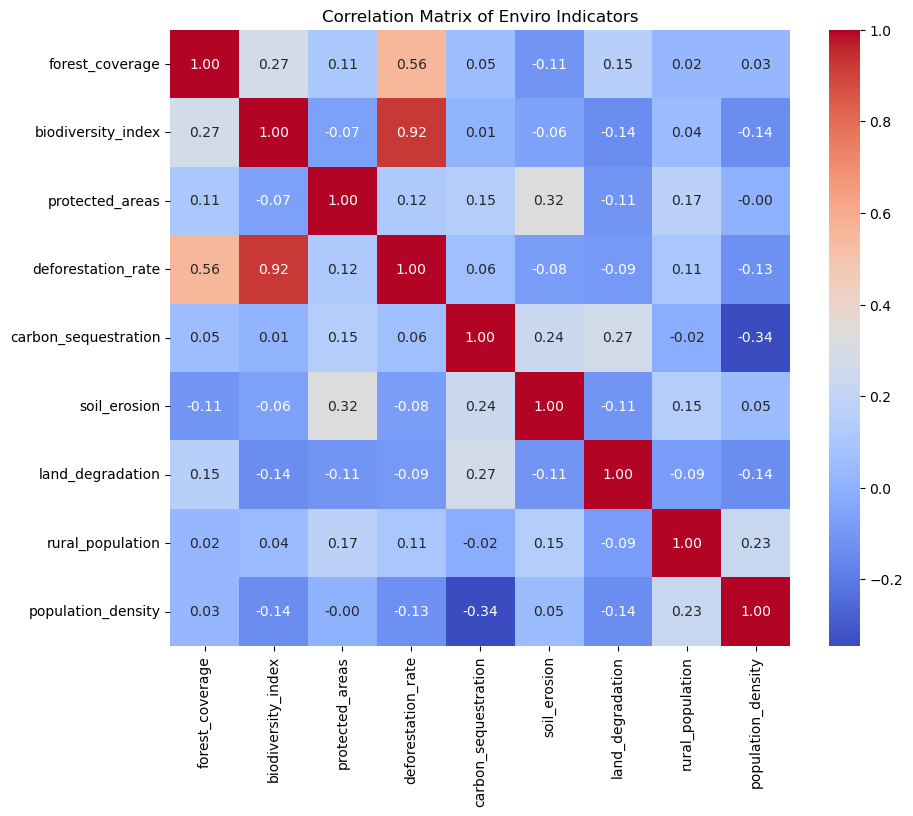

In [16]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Enviro Indicators')
plt.show()

## 4. Data preprocessing

In [17]:
# Separate the feature and target variables
X = data.drop(['deforestation_rate'], axis=1)
y = data['deforestation_rate']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Initialize and apply MinMaxScaler for scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model training and evaluation

### 5.1 Simple linear regression model

In [18]:
# Preparing data for simple linear regression

X_train_lr = pd.DataFrame(X_train_scaled, columns=X.columns)[['biodiversity_index']]
X_test_lr = pd.DataFrame(X_test_scaled, columns=X.columns)[['biodiversity_index']]

# Training the model
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)

# Making predictions on the test data
y_pred_lr = model_lr.predict(X_test_lr)

# Evaluating the model
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")

R² Score: 0.7796880837025596
MSE: 108.58195233862874


### 5.2 Other regression models

#### A generic function for model training and evaluation:

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
def train_and_evaluate_model(model):
    
    # Train the model on the scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    
    return model, r2, mse

### 5.2.1 Multiple linear regression model

In [28]:
# Training and evaluating the multiple linear regression model
linear_model, linear_r2, linear_mse = train_and_evaluate_model(LinearRegression())
print(f"Linear regression - R²: {linear_r2}, MSE: {linear_mse}")

Linear regression - R²: 0.9640788719206098, MSE: 17.70392760689466


### 5.2.2 Decision tree regression model

In [29]:
# Training and evaluating the decision tree regression model
tree_model, tree_r2, tree_mse = train_and_evaluate_model(DecisionTreeRegressor(random_state=42, max_depth=4))
print(f"Decision tree regression - R²: {tree_r2}, MSE: {tree_mse}")

Decision tree regression - R²: 0.7601401895456967, MSE: 118.21624061196674


### 5.3 Ensemble models

### 5.3.1 Random forest regression model

In [33]:
# Training and evaluating the random forest regression model
forest_model, forest_r2, forest_mse = train_and_evaluate_model(RandomForestRegressor(random_state=42, max_depth=5))
print(f"Random Forest Regression - R²: {forest_r2}, MSE: {forest_mse}")

Random Forest Regression - R²: 0.8825862341591495, MSE: 57.868027025909264


### 5.3.2 Stacking ensemble model

In [34]:
# Define the base models: these are models that have already been trained
base_models = [
    ('linear_regression', linear_model),
    ('random_forest', forest_model)
]

# Define the meta-learner
final_estimator = LinearRegression()

In [35]:
# Training and evaluating the stacking regression model
stacking_model, stacking_r2, stacking_mse = train_and_evaluate_model(StackingRegressor(estimators=base_models, final_estimator=final_estimator, cv=5))
print(f"Stacking Regression - R²: {stacking_r2}, MSE: {stacking_mse}")

Stacking Regression - R²: 0.9632832181729627, MSE: 18.096069978297034
